In [12]:
import requests
import pandas as pd
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=1min&apikey=8NY5A51OROX11O2Y'
r = requests.get(url)
data = r.json()

data = pd.DataFrame(data)



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.sectorperformance import SectorPerformances

In [14]:
key = '8NY5A51OROX11O2Y'

In [16]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns
data['TradeDate'] = data.index.date
data['time'] = data.index.time
data

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-01-06 20:00:00,113.6500,113.68,113.50,113.68,22581.0,2023-01-06,20:00:00
2023-01-06 19:59:00,113.5600,113.75,113.56,113.69,19954.0,2023-01-06,19:59:00
2023-01-06 19:58:00,113.5800,113.64,113.50,113.56,6281.0,2023-01-06,19:58:00
2023-01-06 19:57:00,113.4700,113.60,113.46,113.60,11270.0,2023-01-06,19:57:00
2023-01-06 19:56:00,113.4401,113.49,113.44,113.47,11318.0,2023-01-06,19:56:00
...,...,...,...,...,...,...,...
2022-12-27 04:05:00,123.7100,123.85,123.31,123.31,22738.0,2022-12-27,04:05:00
2022-12-27 04:04:00,123.2800,123.84,123.28,123.71,20504.0,2022-12-27,04:04:00
2022-12-27 04:03:00,122.8000,123.60,122.80,123.35,29063.0,2022-12-27,04:03:00


In [5]:
sp = SectorPerformances(key, output_format='pandas')
data, meta_data = sp.get_sector()
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '2023-01-09 04:55:18 US/Eastern'}

In [6]:
data.head()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Materials,0.0344,0.0344,0.0268,-0.0167,0.1180,0.0345,-0.1094,0.3510,0.2848,1.0723
Information Technology,0.0299,0.0299,0.0009,-0.0623,-0.0212,0.0022,-0.2636,0.3423,0.8883,3.6095
Real Estate,0.0286,0.0286,0.0146,-0.0071,0.0380,0.0248,-0.2320,-0.0038,0.1911,NaN
Consumer Staples,0.0271,0.0271,0.0127,-0.0019,0.1097,0.0175,-0.0190,0.2376,0.3482,1.1405
Industrials,0.0269,0.0269,0.0231,0.0063,0.1496,0.0272,-0.0479,0.2213,0.3025,1.5208


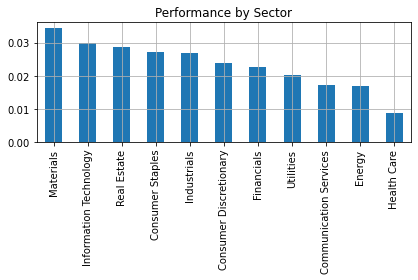

In [7]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title("Performance by Sector")
plt.tight_layout()
plt.grid(True)

In [8]:
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries

In [9]:
ta = TechIndicators(key, output_format='pandas')

In [10]:
goog, meta = ta.get_sma('GOOG', interval='daily', time_period=200, series_type='close')

In [11]:
goog

,SMA
date,
2015-01-09,27.6381
2015-01-12,27.6216
2015-01-13,27.6057
2015-01-14,27.5917
2015-01-15,27.5753
...,...
2022-12-30,110.1079
2023-01-03,109.8834
2023-01-04,109.6430
